
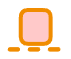

In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
 It starts here
it is done here
{   'cavs_degenerate': {   'CELL TYPE': 'mid-cell',
                           'FREQ': 801.5801506341757,
                           'IC': [   42.0,
                                     23.0,
                                     42.5,
                                     57.5,
                                     70.24238959559739,
                                     93.5,
                                     172.95435541203696,
                                     104.87187454514415],
                           'OC': [   47.0,
                                     23.0,
                                     42.5,
                                     57.5,
                                     70.59919028624745,
                                     93.5,
                                     172.95435541203696,
                                     

<Axes: xlabel='$z$ [mm]', ylabel='$r$ [mm]'>

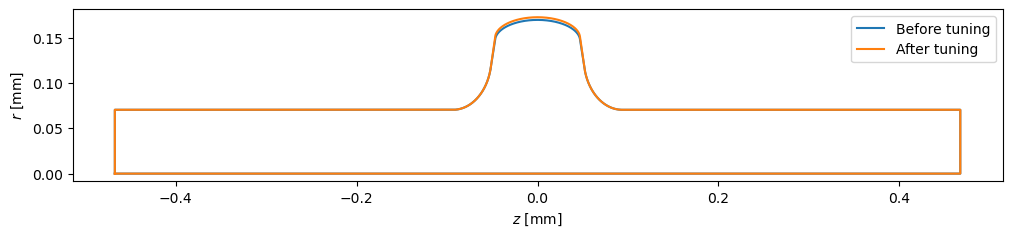

In [2]:
# define geometry parameters
midcell = np.array([42.0, 23.0, 42.5, 57.5, 70.24238959559739, 93.5, 170.0, 0])
endcell = np.array([47.0, 23.0, 42.5, 57.5, 70.59919028624745, 93.5, 170.0, 0])
endcell_r = np.array([47.0, 23.0, 42.5, 57.5, 70.59919028624745, 93.5, 170.0, 0])

# create cavity
cav_degenerate = Cavity(1, midcell, endcell, endcell, beampipe='both')
ax = cav_degenerate.plot('geometry', label='Before tuning')

cavs_degenerate = Cavities()
cavs_degenerate.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

cavs_degenerate.add_cavity(cav_degenerate, 'cavs_degenerate')

tune_config = {
    'freqs': 801.58,
    'parameters': 'Req',
    'cell_types': 'mid-cell',
    'processes': 1,
    'rerun': True,
    'eigenmode_config': {
        'processes': 3,
        'rerun': True,
        'boundary_conditions': 'mm',
        'uq_config': {
            'variables': ['A', 'B', 'a', 'b'],
            # 'objectives': ["freq [MHz]", "R/Q [Ohm]", "Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "G [Ohm]", "kcc [%]", "ff [%]"],
            'objectives': ["Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "R/Q [Ohm]", "G [Ohm]"],
            # 'objectives': ["ZL"],
            'delta': [0.05, 0.05, 0.05, 0.05],
            'processes': 4,
            'distribution': 'gaussian',
            # 'method': ['QMC', 'LHS', 1000],
            # 'method': ['QMC', 'Sobol', 1000],
            # 'method': ['Qudrature', 'Gaussian', 1000],
            'method': ['Quadrature', 'Stroud3'],
            # 'method': ['Quadrature', 'Stroud5'],
            # 'gaussian': ['Quadrature', 'Gaussian'],
            # 'from file': ['<file path>', columns],
            'cell_type': 'mid-cell',
            'cell complexity': 'simplecell'
            }
    }
}
cavs_degenerate.run_tune(tune_config)
# cavs_degenerate.run_tune('A', freqs=801.58, cell_types='end cell', rerun=True, solver='ngsolve', n_cells=1)
pp.pprint(cavs_degenerate.eigenmode_tune_res)

# plot geometry after tuning
cav_degenerate.plot('geometry', ax, label='After tuning')

In [3]:
ax_obj_dict = cavs_degenerate.save_plot_as_json(ax)

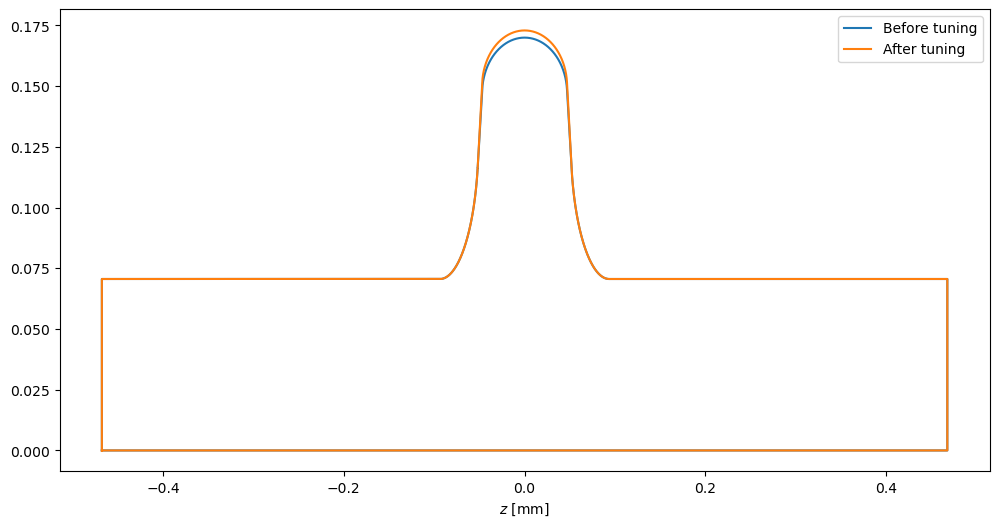

In [4]:
cavs_degenerate.plot_from_json(ax_obj_dict)

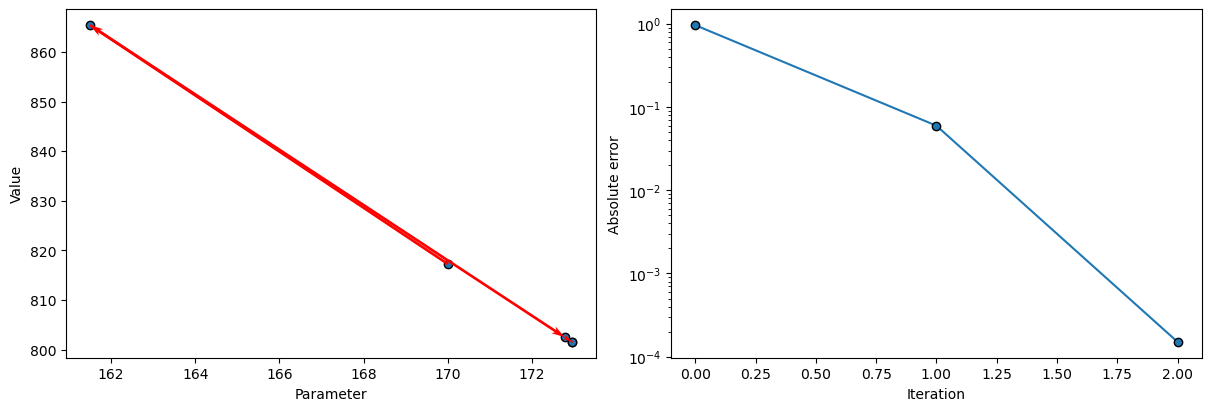

In [5]:
cavs_degenerate.plot('convergence')
plt.show()